# Lezione 11

## Dario Pullia

Introduciamo i primi modelli di Reti Neurali. Una rete neurale è un *fittatore universale* composto da una serie di livelli ognuno dei quali è composto da un numero variabile di neuroni. Ogni neurone è collegato a quelli precedenti e ai successivi ed ogni collegamento ha con sè un peso. **Allenare** una rete neurale significa ottimizzare tutti i parametri di tutti i neuroni affinchè un dato inputi restituisca un output quanto più veritiero possibile.

### Esercizio 11.1

Iniziamo studiando come la dimensione del dataset e la variazione del numero di *epochs* influisce sul fitting di una retta banale $$
f(x)=2x+1
$$


Creiamo i dati di allenamento e di test estraendo 550 punti a caso nell'intervallo $x\in[-1,1]$ ed estraendo in modo gaussiano la corrispettiva y intorno al valore vero con sigma 0.8 (numero arbitrario che si è visto funzionare bene).

La rete neurale scelta è composta da un singolo neurone e quindi solo da 2 parametri (peso e bias).



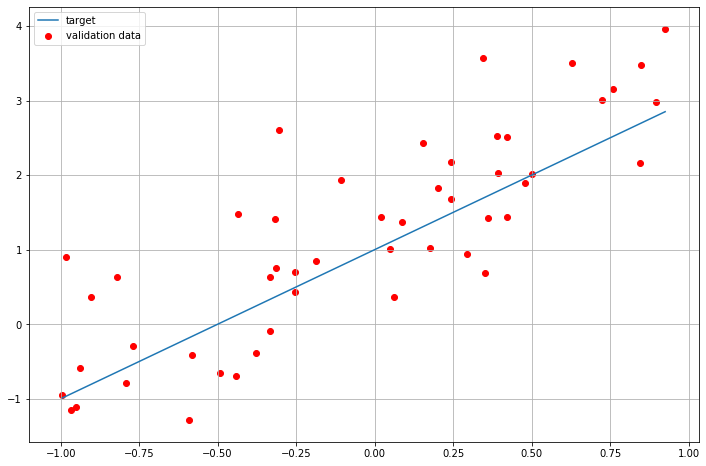

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import get_custom_objects
import numpy as np
import matplotlib.pyplot as plt

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.8 # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)


# plot validation and target dataset
fig=plt.figure(figsize=(12,8))

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()







Fisso il numero di epoche $N_{epochs}=30$ e studio come la variazione di punti di allenamento influisce nel fitting finale.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
50/50 [==============================] - 0s 43us/sample - loss: 2.2917e-04 - mean_squared_error: 2.2917e-04


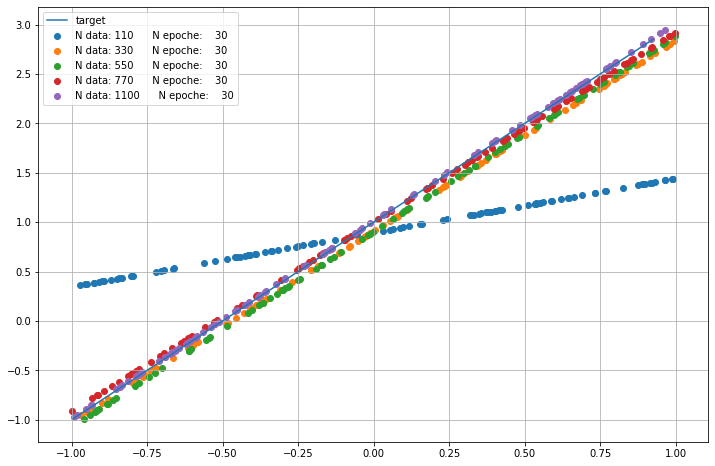

In [3]:
epochs=30
fig=plt.figure(figsize=(12,8))

for i in [110,330,550,770,1100]:
    K.clear_session()
    save_model_path='data01/models/model_data_%s_Ep_%s.h5'%(i, epochs)
    model= keras.models.load_model(filepath=save_model_path)

    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

    # evaluate model with the exact curve
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,label='N data: %s      N epoche:    %s'%(i, epochs))

plt.plot(x_valid, y_target, label='target')
plt.legend()
plt.grid(True)
plt.show()

Come prevedibile la bontà del fitting dipende dalla quantità di dati di allenamento forniti. Notiamo però che solo il caso con 110 punti è molto sbagliato, già con 330 punti la rete ha una buona capacità predittiva.

Al contrario ora fissiamo la quantità di punti di allenamento a N=500 e vediamo l'evoluzione al variare del numero di epoche.


50/50 [==============================] - 0s 37us/sample - loss: 0.0110 - mean_squared_error: 0.0110


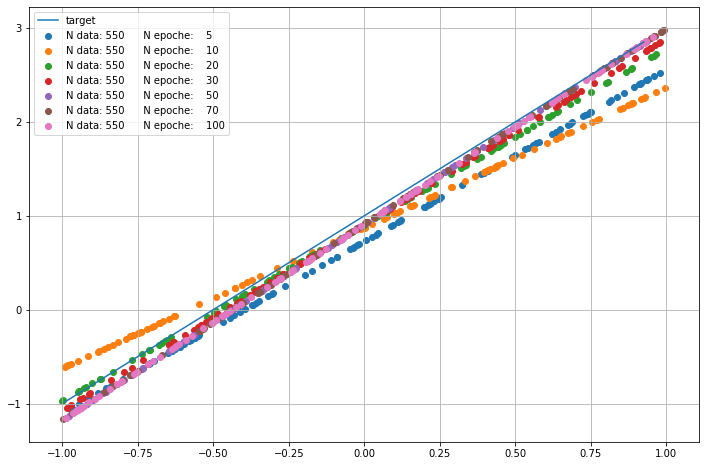

In [4]:
datasize=550 #500 train, 50 test
fig=plt.figure(figsize=(12,8))

for i in [5,10,20,30,50,70,100]:
    K.clear_session()
    save_model_path='data01/models/model_data_%s_Ep_%s.h5'%(datasize, i)
    model= keras.models.load_model(filepath=save_model_path)

    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

    # evaluate model with the exact curve
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,label='N data: %s      N epoche:    %s'%(datasize, i))
plt.plot(x_valid, y_target, label='target')
plt.legend()
plt.grid(True)
plt.show()

### Esercizio 11.2

Ora modifichiamo il modello affinchè predica la funzione 
$$
f(x)=4-3x-2x^2+3x^3
$$
con $x \in [-1,1]$.

Fissata $N_{epoche}=30$ e con un dataset di 1100 punti (1000 training, 100 test), studiamo la variazione della capacità predittiva al variare del **numero di neuroni** $N_N$, di **layer** $N_L$ e al variare della **funzione di attivazione**. 

La funzione di attivazione del layer di output è fissata *linear* poichè per la natura del problema da risolvere dev'essere illimitata.

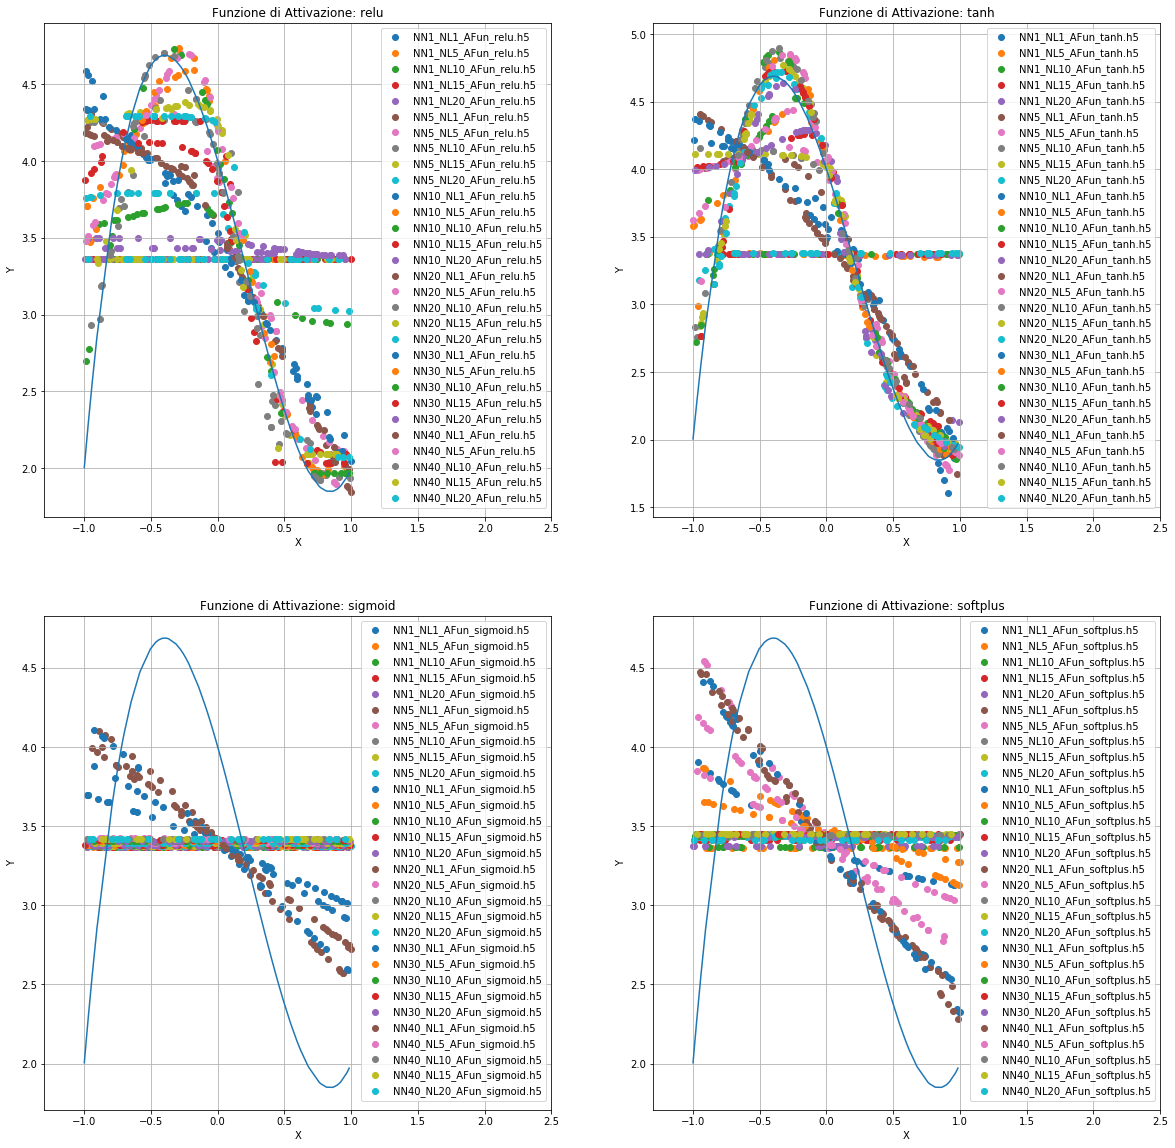

In [10]:
NN=[1,5,10,20,30,40]
NL=[1,5,10,15,20]
AFun=['relu','sigmoid','tanh','softplus']
LFun=['mean_squared_error',]
Opt=['SGD']


x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = 4-3*x_valid-2*x_valid**2+3*x_valid**3 # ideal (target) polinomial function

fig, ax = plt.subplots(2,2,figsize=(20, 20))


plt.xlim([-1.3, 2.5])

for i in NN:
    for j in NL:
        for k,fun in enumerate(AFun):
            for m in LFun:
                for n in Opt:
                    K.clear_session()
                    save_model_path='data02/models/model_NN%d_NL%d_AFun_%s_LFun_%s_Opt_%s.h5'%(i,j,fun,m,n)

            model= keras.models.load_model(filepath=save_model_path)
            x_predicted = np.random.uniform(-1, 1, 30)
            y_predicted = model.predict(x_predicted)
            ax[k%2][int(k/2)%2].scatter(x_predicted, y_predicted,label='NN%d_NL%d_AFun_%s.h5'%(i,j,fun))

for k,fun in enumerate(AFun):
    ax[k%2][int(k/2)%2].plot(x_valid, y_target)
    ax[k%2][int(k/2)%2].set_xlabel('X')
    ax[k%2][int(k/2)%2].set_ylabel('Y')
    ax[k%2][int(k/2)%2].set_title('Funzione di Attivazione: '+fun)
    ax[k%2][int(k/2)%2].grid(True)
    ax[k%2][int(k/2)%2].legend()
    ax[k%2][int(k/2)%2].set_xlim([-1.3, 2.5])

    
plt.show()

Notiamo quando la scelta della funzione di attivazione può impattare nella bontà del modello. 
Inaspettatamente notiamo che funzioni simili come relu-softplus e tanh-sigmoid possano comportarsi in modo così diverso e funzioni diverse come relu-tanh possano comportarsi in modo simile.


Lo standard si è spostato da funzioni come la sigmoide a funzioni simili alla relu poichè la sigmoide ha una regione ad alta pendenza ma due code piatte incapaci di restituire una buona variazione anche per ampie variazioni sull'asse x.


Scegliamo di usare la funzione di attivazione **relu** e ne studiamo il comportamento per più combinazioni di $N_N$ e $N_L$.

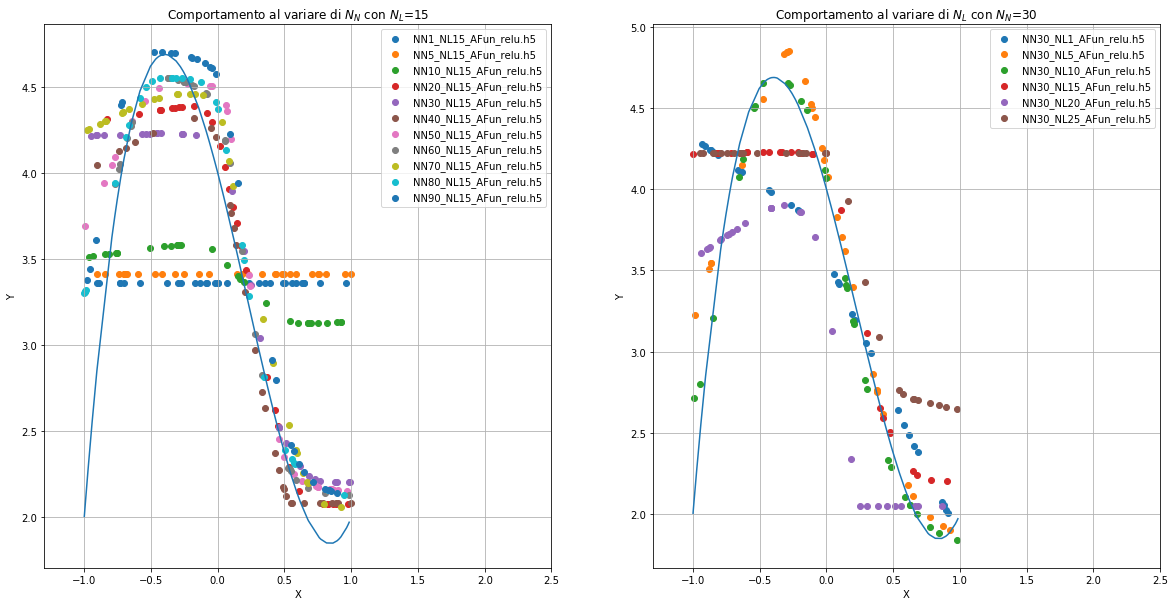

In [12]:
NN=[1,5,10,20,30,40,50,60,70,80,90]
NL=[1,5,10,15,20,25]
fig, ax = plt.subplots(1,2,figsize=(20, 10))


plt.xlim([-1.3, 2.5])
fun='relu'
m='mean_squared_error'
n='SGD'
for i in NN: #Esploro il comportamento con un numero fisso di layer
    #for j in NL:
    j=15
    K.clear_session()
    save_model_path='data02/models/model_NN%d_NL%d_AFun_%s_LFun_%s_Opt_%s.h5'%(i,j,fun,m,n)
    model= keras.models.load_model(filepath=save_model_path)
    x_predicted = np.random.uniform(-1, 1, 30)
    y_predicted = model.predict(x_predicted)
    ax[0].scatter(x_predicted, y_predicted,label='NN%d_NL%d_AFun_%s.h5'%(i,j,fun))
    ax[0].set_title('Comportamento al variare di $N_N$ con $N_L$=15')

#for i in NN:
for j in NL: #Esploro il comportamento con un numero fisso di neuroni per layer
    i=30
    K.clear_session()
    save_model_path='data02/models/model_NN%d_NL%d_AFun_%s_LFun_%s_Opt_%s.h5'%(i,j,fun,m,n)
    model= keras.models.load_model(filepath=save_model_path)
    x_predicted = np.random.uniform(-1, 1, 30)
    y_predicted = model.predict(x_predicted)
    ax[1].scatter(x_predicted, y_predicted,label='NN%d_NL%d_AFun_%s.h5'%(i,j,fun))
    ax[1].set_title('Comportamento al variare di $N_L$ con $N_N$=30')
    
    
    
for k in range(2):
    ax[k].plot(x_valid, y_target)
    ax[k].set_xlabel('X')
    ax[k].set_ylabel('Y')
    ax[k].grid(True)
    ax[k].legend()
    ax[k].set_xlim([-1.3, 2.5])

    
plt.show()

100/100 [==============================] - 0s 796us/sample - loss: 1.0399 - mean_squared_error: 1.0399


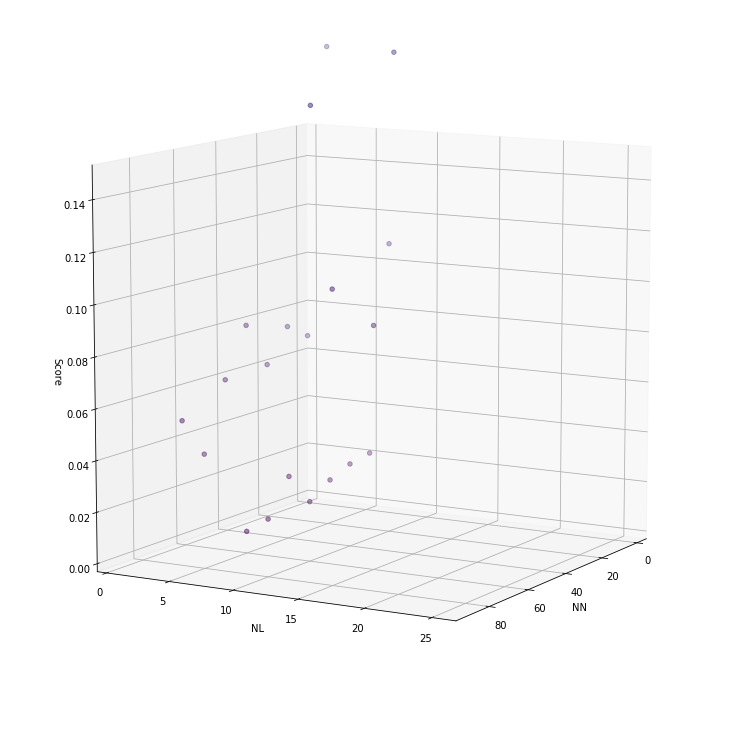

In [14]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib qt #Commentare e scommentare per vedere il 3d vero
fun='relu'


X=[]
Y=[]
Z=[]


for i in NN: #Esploro il comportamento con un numero fisso di layer
    for j in NL:
        K.clear_session()
        save_model_path='data02/models/model_NN%d_NL%d_AFun_%s_LFun_%s_Opt_%s.h5'%(i,j,fun,m,n)
        model= keras.models.load_model(filepath=save_model_path)
        score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
        X.append(i)
        Y.append(j)
        Z.append(score[0])


fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c=Z, marker='o')
ax.set_xlabel('NN')
ax.set_ylabel('NL')
ax.set_zlabel('Score')
#ax.set_zscale('')
ax.set_zlim([0.,0.15])
ax.view_init(10, 30)
plt.show()

Osserviamo come a parità di dati i modelli troppo complessi non rispondono bene a causa di un allenamento non sufficiente e prevedibilmente modelli troppo semplici non sono in grado di fittare bene una funzione di terzo grado.

Di conseguenza scelgo la combinazione con $N_N=50$ e $N_L=10$ per studiare il comportamento del modello al variare della **Loss function** e dell'**Optimizer**.

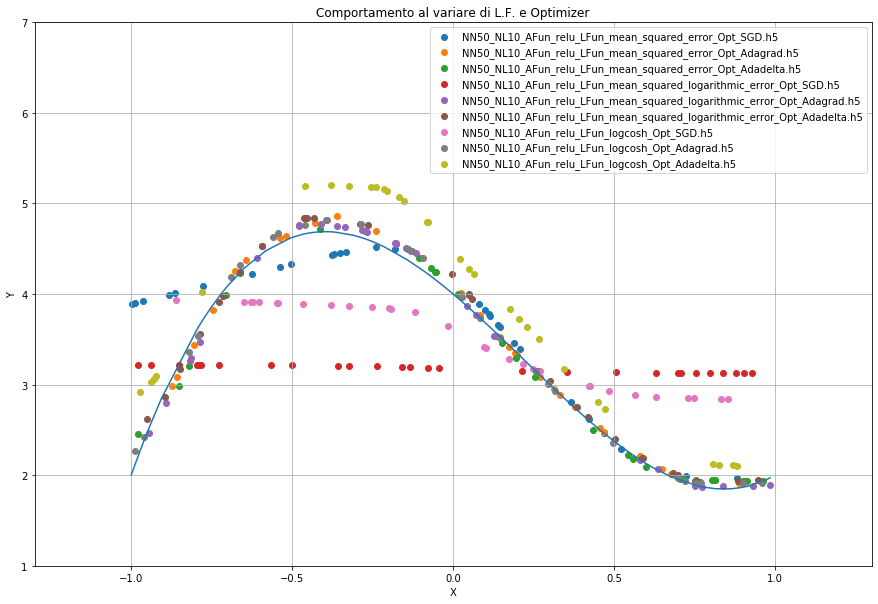

In [18]:
NN=[50]
NL=[10]
AFun=['relu']
LFun=['mean_squared_error','mean_squared_logarithmic_error','logcosh',]
Opt=['SGD','Adagrad','Adadelta']

fig = plt.figure(figsize=(15, 10))



for i in NN:
    for j in NL:
        for k in AFun:
            for m in LFun:
                for n in Opt:
                    K.clear_session()
                    save_model_path='data02/models/model_NN%d_NL%d_AFun_%s_LFun_%s_Opt_%s.h5'%(i,j,k,m,n)
                    model= keras.models.load_model(filepath=save_model_path)
                    x_predicted = np.random.uniform(-1, 1, 30)
                    y_predicted = model.predict(x_predicted)
                    plt.scatter(x_predicted, y_predicted,label='NN%d_NL%d_AFun_%s_LFun_%s_Opt_%s.h5'%(i,j,k,m,n))

plt.plot(x_valid, y_target)
plt.grid(True)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comportamento al variare di L.F. e Optimizer')
plt.xlim([-1.3, 1.3])    
plt.ylim([1, 7])    
NN=[50]
NL=[10]
AFun=['relu']
LFun=['mean_squared_error','mean_squared_logarithmic_error','logcosh',]
Opt=['SGD','Adagrad','Adadelta']
plt.show()

Alcune combinazioni funzionano meglio di altre. Scelgliamo di utilizzare il modello con Loss F. **logcosh** e **Adagrad** come optimizer. A questo punto estendiamo l'intervallo sulle ascisse a $x \in [-1,2]$ e studiamo come si comporta il modello al di fuori dei punti su cui è stato allenato.

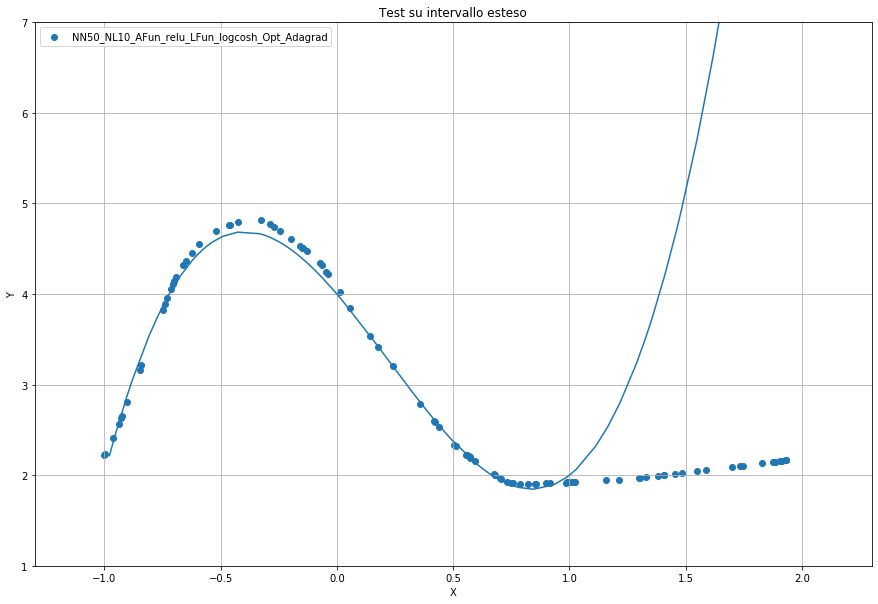

In [22]:
x_valid = np.random.uniform(-1, 2, 100)
x_valid.sort()
y_target = 4-3*x_valid-2*x_valid**2+3*x_valid**3 # ideal (target) polinomial function


save_model_path='data02/models/model_NN50_NL10_AFun_relu_LFun_logcosh_Opt_Adagrad.h5'
model= keras.models.load_model(filepath=save_model_path)
fig = plt.figure(figsize=(15, 10))

x_predicted = np.random.uniform(-1, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,label='NN50_NL10_AFun_relu_LFun_logcosh_Opt_Adagrad')


plt.plot(x_valid, y_target)
plt.grid(True)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Test su intervallo esteso')
plt.xlim([-1.3, 2.3])    
plt.ylim([1, 7])    
plt.show()

Nell'intervallo $x\in [1,2]$ il comportamento osservato è pessimo.
Osserviamo che una rete neurale **non può** essere utilizzata per fittare dati in regioni in cui non è stata allenata. 

### Esercizio 11.3

Applicando gli stessi parametri, creiamo un modello per fittare la funzione $$f(x,y) = \sin(x^2+y^2)$$ con $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.




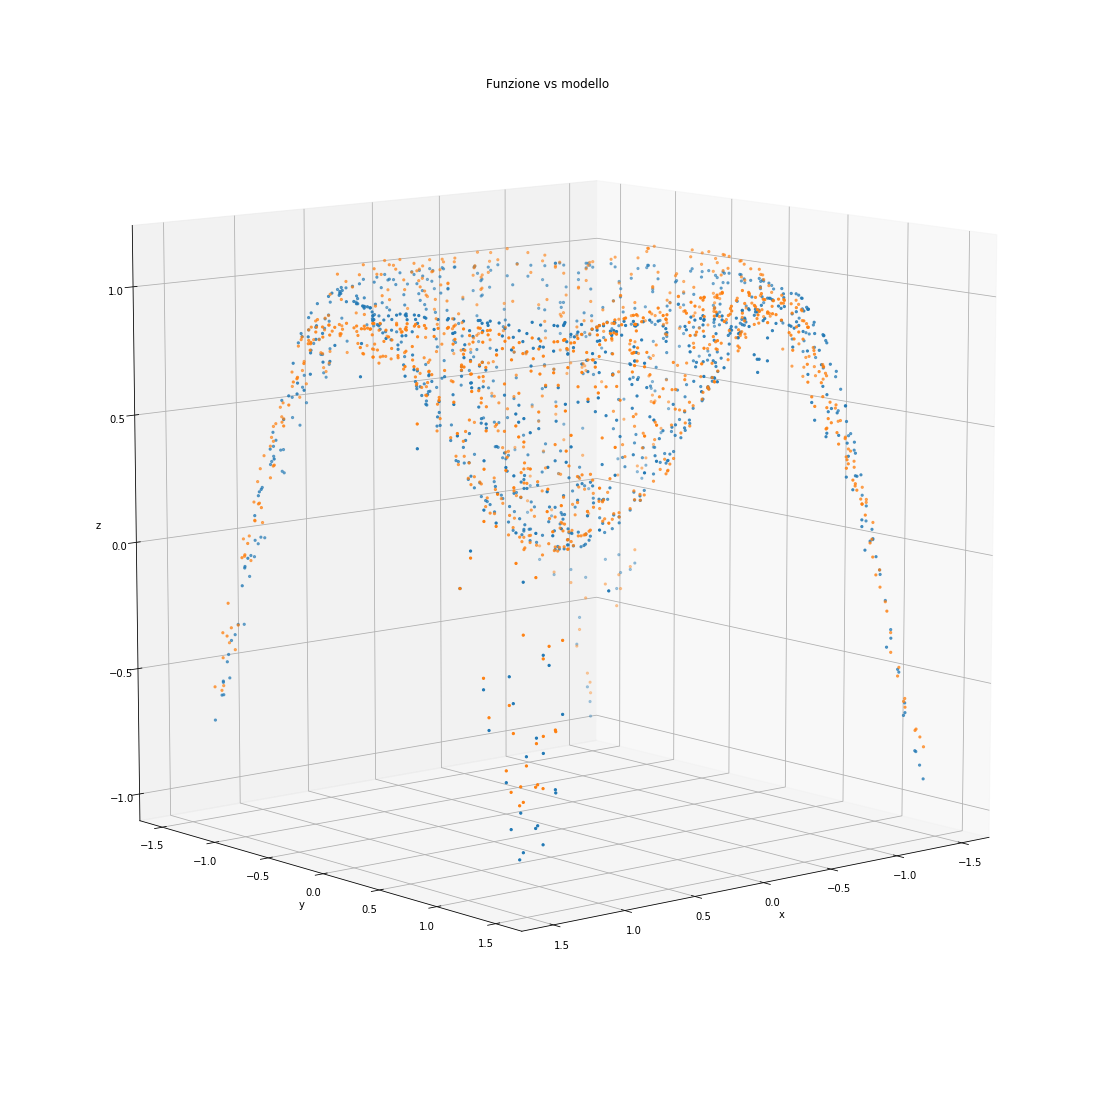

In [25]:
from mpl_toolkits.mplot3d import Axes3D


save_model_path='data03/models/model_NN50_NL10_AFun_relu_LFun_logcosh_Opt_Adagrad.h5'
model= keras.models.load_model(filepath=save_model_path)


x_predicted = np.random.uniform(-1.5, 1.5, (1000,2))
y_predicted = model.predict(x_predicted)


fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)


ax.scatter(x_predicted[:,0], x_predicted[:,1],np.sin(x_predicted[:,0]**2 + x_predicted[:,1]**2), marker='.',label='Modello')
ax.scatter(x_predicted[:,0], x_predicted[:,1],y_predicted, marker='.',label='Valore teorico')
ax.set_title('Funzione vs modello')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 50)
plt.show()



Dal confronto osserviamo una buona capacità predittiva del modello.